# Data Visualization II

- tools:
    - `matplotlib`
    - `seaborn`
    - `pandas`
- plotting
    - quantitative data
    - categorical data
- customizing visualizations

<div class="alert alert-success">
For more information on this topic, check out: (1) Jake VanderPlas' <a href="https://github.com/jakevdp/PythonDataScienceHandbook" class="alert-link">Python Data Science Handbook</a> and (2) Berkeley's <a href="https://www.textbook.ds100.org/ch/06/viz_intro.html" class="alert-link">Data 100 Textbook</a>.
</div>

A good data visualization can help you:
- identify anomalies in your data
- better understand your own data
- communicate your findings


# Getting Started

First we'll import the libraries we'll use for plotting. 

In [1]:
# import working with data libraries
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt # Typical way of import MPL
import matplotlib as mpl # This line is used less frequently

# Getting started: `matplotlib`

If you want to really have fine-tune control over your final plot, you'll need to use `matplotlib`. We'll discuss a few conceptual basics here and will then combine these concepts with plotting in `seaborn` to help demonstrate how to generate figures that don't stink.

In `matplotlib` the process involves the following:
1. Create the figure
2. Add axes to the figure

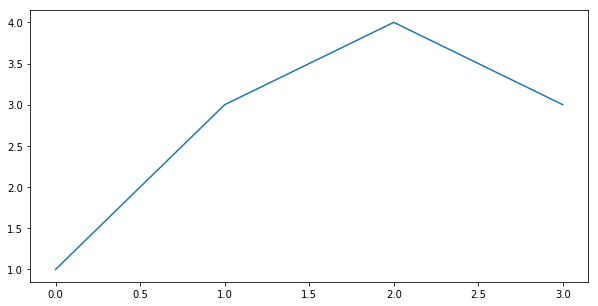

In [2]:
# Create a figure
f = plt.figure(figsize=(10, 5))

# Add an axes to the figure. 
# The first and second arguments create a 1x1 table
# The third argument places the axes in the first
# cell of the table.
ax = f.add_subplot(1, 1, 1) # nrows, ncolumns, index

# Create a line plot on the axes
ax.plot([0, 1, 2, 3], [1, 3, 4, 3])

# Show the plot.
# In Jupyter notebook you don't need this
# It will show up
plt.show()

# Line Plots

We'll demonstrate how to customize a plot in `matplotlib` with a line plot. 

Here we're plotting two quantitiative variables on a single plot.

In [3]:
# generate some data
x = np.arange(0, 10, 0.1)

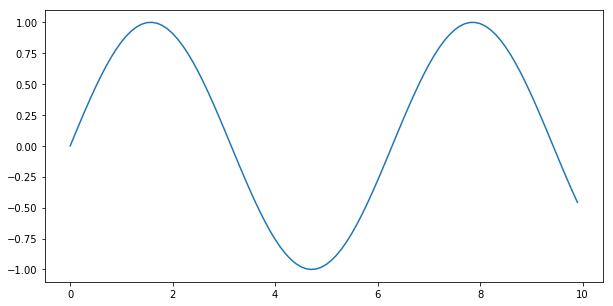

In [4]:
# generate line plot
f = plt.figure(figsize=(10, 5))
ax = f.add_subplot(1, 1, 1)
ax.plot(x, np.sin(x), label='sin(x)');

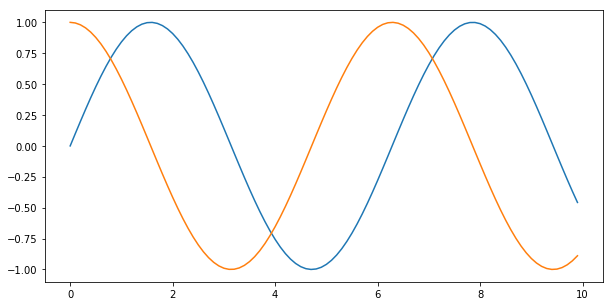

In [5]:
f = plt.figure(figsize=(10, 5))
ax = f.add_subplot(1, 1, 1)

# plot more than one thing 
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)');

Note that `matplotlib` automatically chooses a different color for the second line. 

We can continue to build off of this code by adding additional elements, like a _legend_ and _axis labels_:

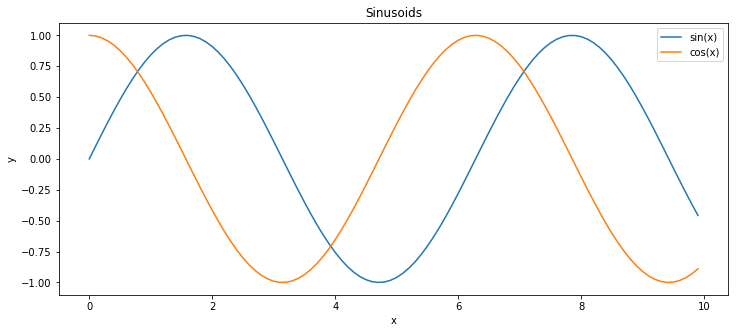

In [6]:
f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)

# generate a a legend
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.legend()

# add title and axis labels
ax.set_title('Sinusoids')
ax.set_xlabel('x')
ax.set_ylabel('y');

## `matplotlib` methods

In addition to `plot`, there are ways to generate a figure that automatically has axes.

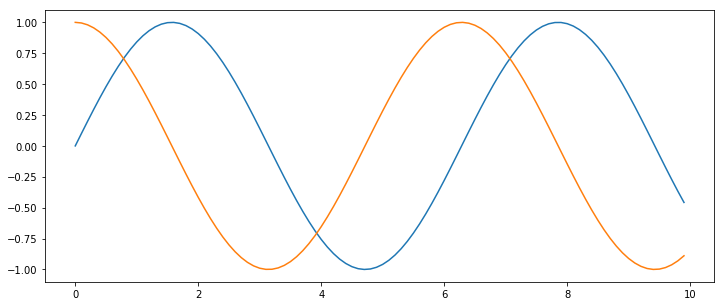

In [7]:
# Shorthand to create figure and axes and call ax.plot
# we can plot more than one thing at a time
f = plt.figure(figsize=(12, 5))

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

This is the same plot we generated above, but in fewer lines of code.

# Customization: Line Color & Style

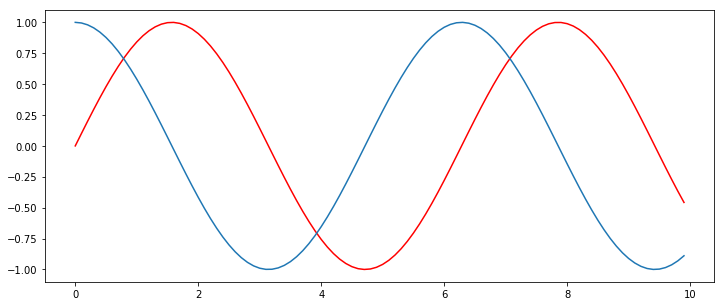

In [8]:
# changing line color
f = plt.figure(figsize=(12, 5))
plt.plot(x, np.sin(x), color = 'red')
plt.plot(x, np.cos(x));

Color can be specified in a number of different ways:
- by name `color = 'red'`
- by short color code, rbgcmyk `color = 'r'`
- grayscale value btween 0 and 1 `color = '0.75'`
- Hex code - RRGGBB `color = '#FFDD44'`
- RGB tuple `color = '1.0,0.2,0.3'`
- HTML color name `color = 'chartreuse'`

## Line Style

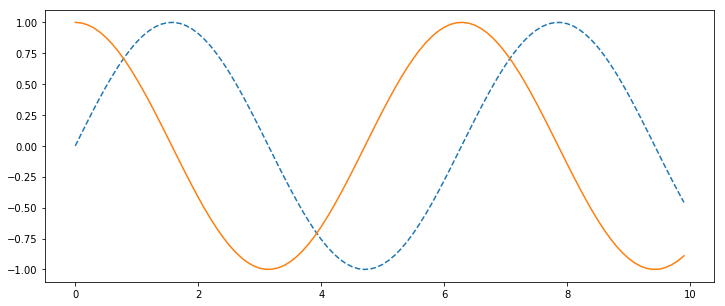

In [9]:
# changing line style
f = plt.figure(figsize=(12, 5))
plt.plot(x, np.sin(x), linestyle='--')
plt.plot(x, np.cos(x));

Linestyle can be specified can be specified in a number of different ways:
- solid : `linestyle = 'solid'` *or* `linestyle = '-'`
- dashed : `linestyle = 'dashed'` *or* `linestyle = '--'`
- dashdot : `linestyle = 'dashdot'` *or* `linestyle = '-.'`
- dotted : `linestyle = 'dotted'` *or* `linestyle = ':'`


## Legend

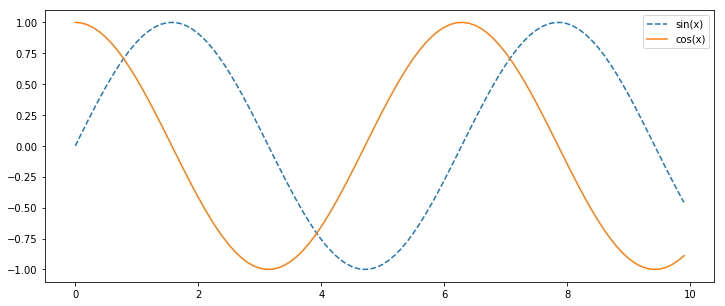

In [10]:
f = plt.figure(figsize=(12, 5))
plt.plot(x, np.sin(x), linestyle='--', label ='sin(x)')
plt.plot(x, np.cos(x), label = 'cos(x)')
# add legend
plt.legend()

##  Multiple plots in a cell


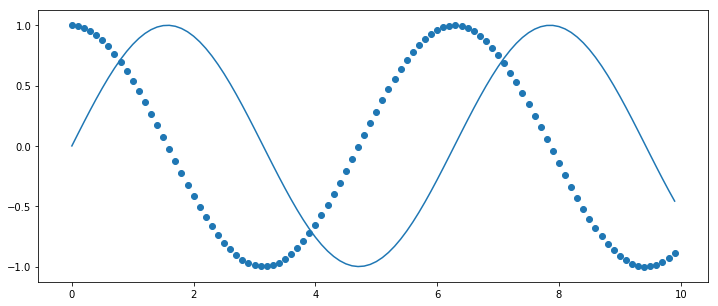

In [11]:
# Same as above
f = plt.figure(figsize=(12, 5))
plt.plot(x, np.sin(x))

# When plt methods are called in the same cell
# existing figure and axes are reused
# adding this to the plot
plt.scatter(x, np.cos(x));

# `seaborn` + `matplotlib`

`seaborn` is a great place to get started when generating plots.

And, good news! You can combine `seaborn` plots with `matplotlib` customizations!

We'll see how to do this below...

# Class Data
With the libraries we need imported, the first dataset we'll use today is data from you class survey! 

In [12]:
df = pd.read_csv('df_for_viz.csv')

In [13]:
df.shape

(843, 11)

In [14]:
df.head()

gender                                 lecture_attendance  job  statistics  \
0  female                         I prefer to attend lecture   No           5   
1    male                         I prefer to attend lecture   No           8   
2  female                         I prefer to attend lecture   No           6   
3    male                         I prefer to attend lecture   No           2   
4    male  I prefer not to attend lecture (i.e. catch up ...  Yes           3   

   programming  Java  MATLAB  R  Python  C  SQL  
0            8     1       0  0       0  0    0  
1            4     0       1  0       1  0    0  
2            7     1       0  0       0  0    0  
3           10     1       0  0       0  1    0  
4           10     1       0  0       0  0    0

Wrangling that's been done:
- removed lots of identifying information
- standardized gender & job
- separated out programming responses

In [15]:
df.describe()

statistics  programming        Java      MATLAB           R  \
count  843.000000   843.000000  843.000000  843.000000  843.000000   
mean     5.575326     6.769870    0.809015    0.265718    0.153025   
std      1.985687     2.367976    0.393310    0.441977    0.360225   
min      1.000000     1.000000    0.000000    0.000000    0.000000   
25%      4.000000     5.000000    1.000000    0.000000    0.000000   
50%      6.000000     7.000000    1.000000    0.000000    0.000000   
75%      7.000000     9.000000    1.000000    1.000000    0.000000   
max     10.000000    10.000000    1.000000    1.000000    1.000000   

           Python           C         SQL  
count  843.000000  843.000000  843.000000  
mean     0.485172    0.198102    0.003559  
std      0.500077    0.398806    0.059584  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000

# Quantitative Variables

- histograms
- densityplots
- scatterplots


## Histograms and Densityplots

__Histograms__ & __Densityplots__ are helpful for visualizing information about a _single quantitative variable_.

We can use seaborn's `distplot` function.

In [16]:
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7) #default plot size to output

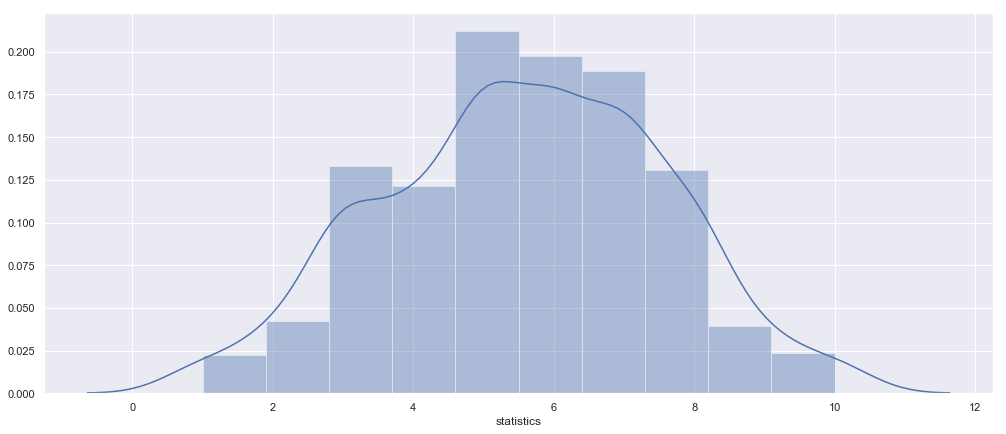

In [17]:
# densityplot + histogram
sns.set()
sns.distplot(df['statistics'], bins=10);

One thing to note about histograms is the fact that the number of  bins displayed plays a large role what the viewer takes away from the visualization.

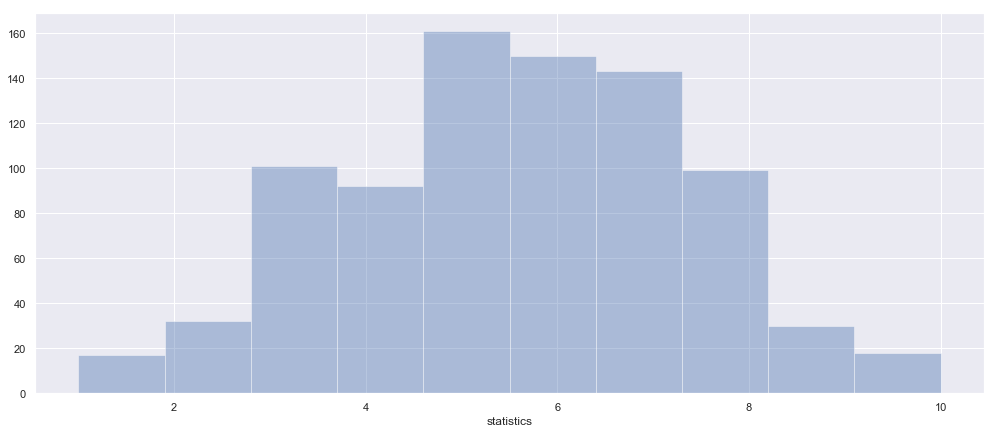

In [18]:
# just histogram - set kde = False
sns.distplot(df['statistics'], kde=False, bins=10);

# Alternative approach using pandas
#df['statistics'].hist(bins=10)

This doesn't follow the "visualization best practices" we talked about last lecture.

We previously learned less is more when it comes to visualization. So, we should probably get rid of this background color now and remove the gridlines. We'll use the _less is more_ approach as we work through the other types of visualizations.

Let's improve that now...

In [19]:
# increase the font size & remove background
# set this for all plots
sns.set(font_scale=2.5, style="white")

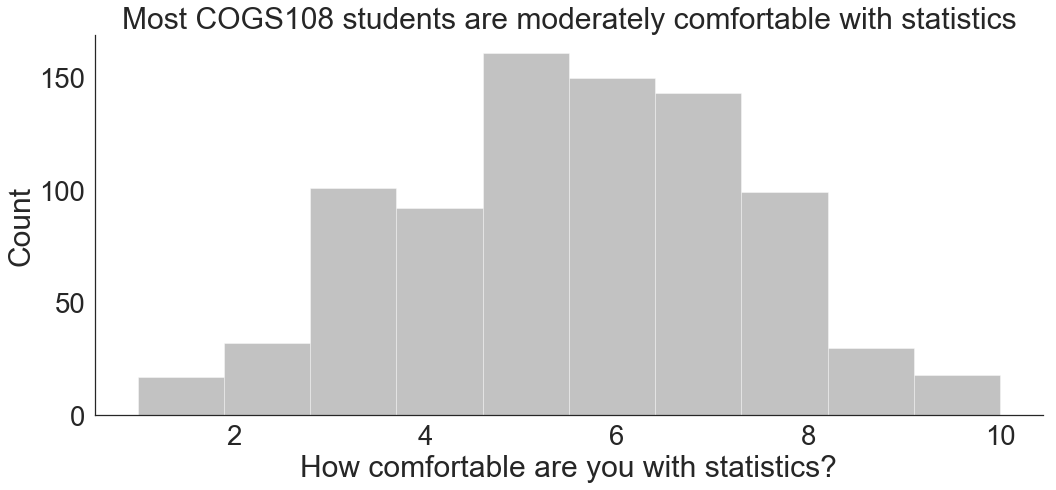

In [20]:
# change color to dark grey
ax = sns.distplot(df['statistics'], kde=False, bins=10, color = '#686868')

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are moderately comfortable with statistics')
ax.set_ylabel('Count')
ax.set_xlabel('How comfortable are you with statistics?');

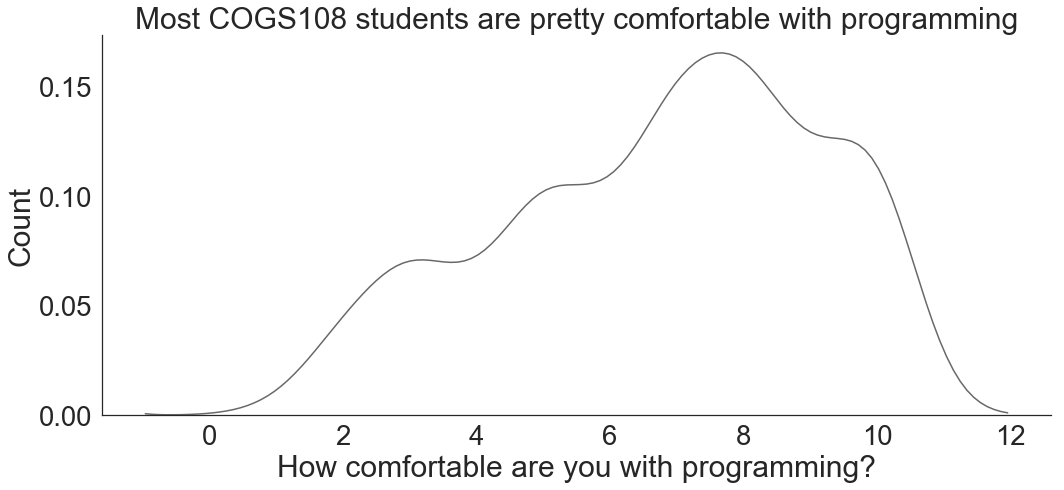

In [21]:
# specify hist=False to only display the densityplot
sns.distplot(df['programming'], hist=False, bins=10, color = '#686868')
ax = plt.gca()

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are pretty comfortable with programming')
ax.set_ylabel('Count')
ax.set_xlabel('How comfortable are you with programming?');

## Scatterplots

Scatterplots can help visualize the relationship between __two quantitative variables__.

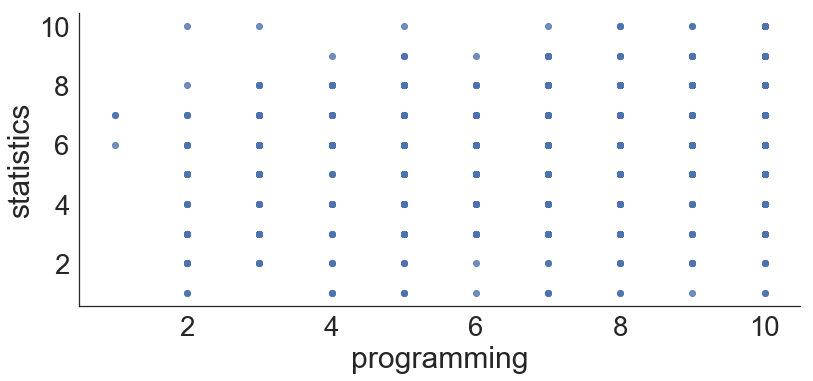

In [22]:
sns.lmplot(x='programming', y='statistics', data=df, 
           fit_reg=False, height=6, aspect=2);

# alternative with pandas
# df.plot.scatter('programming', 'statistics');

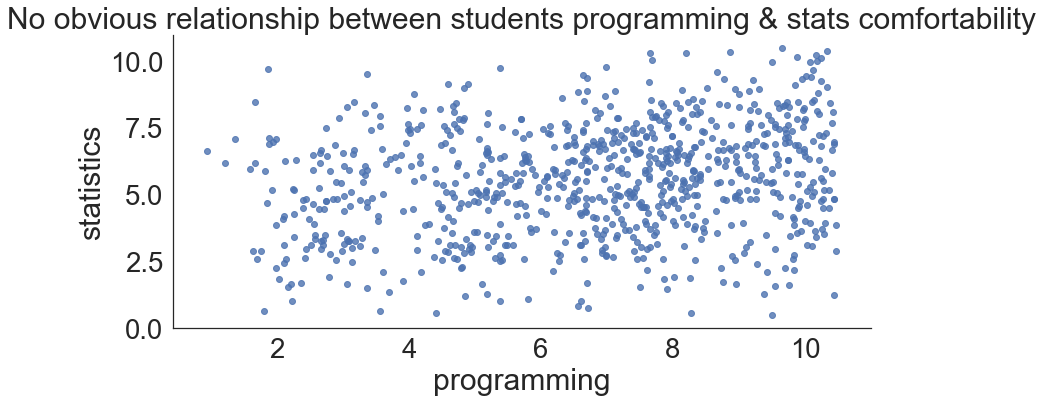

In [23]:
# jitter points to see relationship
sns.lmplot(x='programming', y='statistics', data=df, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5)
# customize title
ax = plt.gca()
ax.set_title('No obvious relationship between students programming & stats comfortability');

## Scatterplots (by a categorical variable)

When you want to plot two numeric variables but want to get some insight about a *third* categorical variable, you can color the points on the plot by the categorical variable.

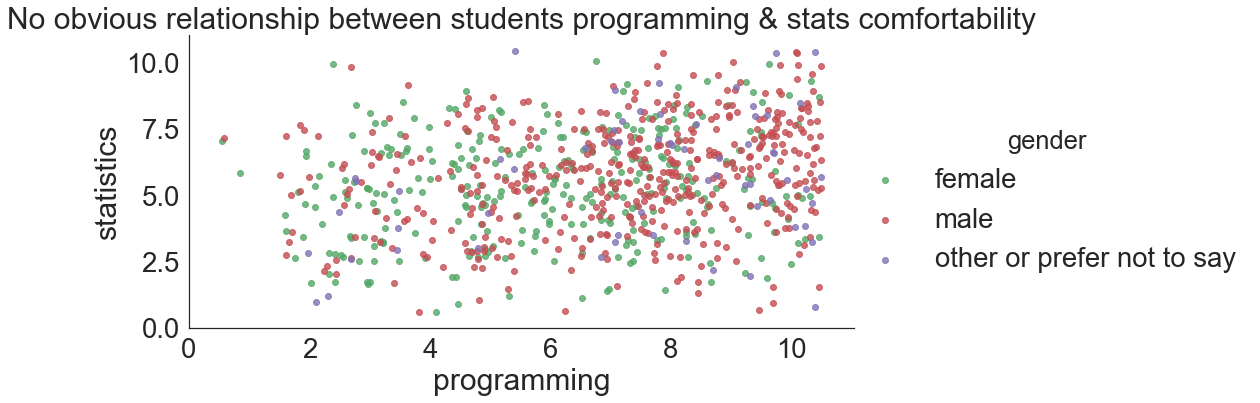

In [24]:
# control color palette
unique = df["lecture_attendance"].append(df["gender"]).unique()
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

# color points by gender is
sns.lmplot(x='programming', y='statistics', data=df, hue='gender',
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5,
          palette=palette)

# customize title
ax = plt.gca()
ax.set_title('No obvious relationship between students programming & stats comfortability');

We don't get a _ton_ more information here, but what we may see a slight shift in programming comfortability to include more males relative to females. To better understand this, a boxplot would be helpful.

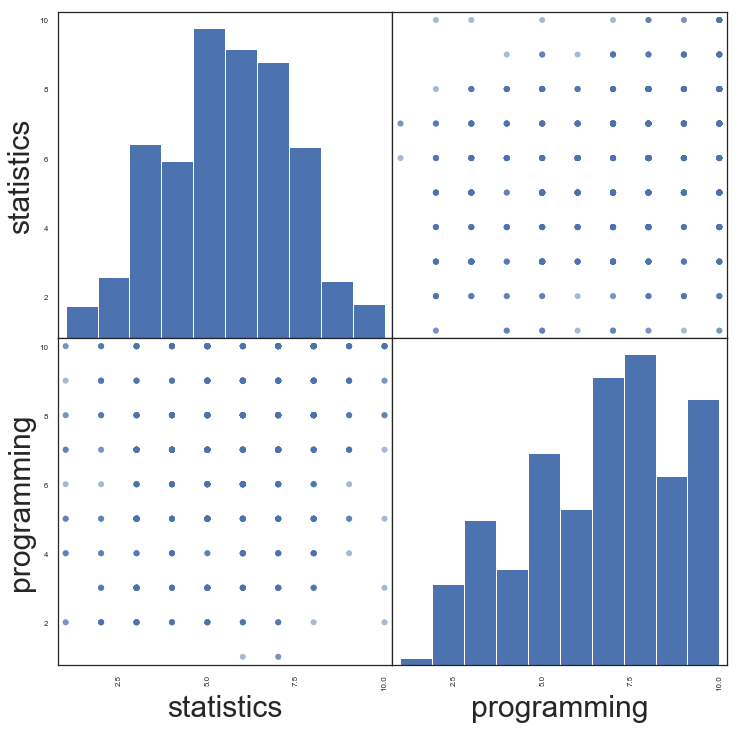

In [25]:
pd.plotting.scatter_matrix(df[['statistics', 'programming']], figsize=[12, 12], marker=12);  

# Categorical Variables

- barplots
- grouped barplots
- stacked barplots

## Barplots

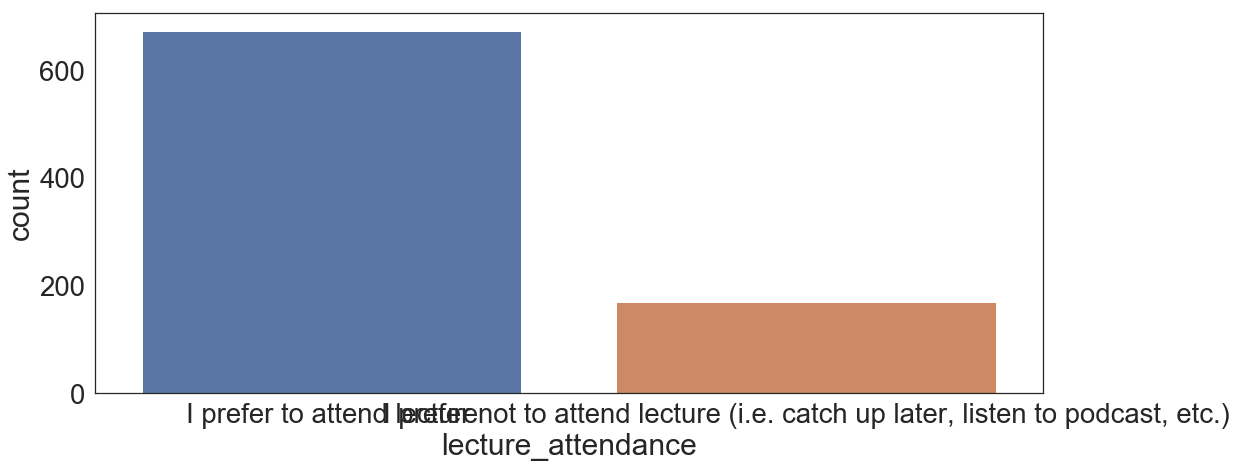

In [26]:
# generate default barplot
sns.countplot(x='lecture_attendance', data=df);

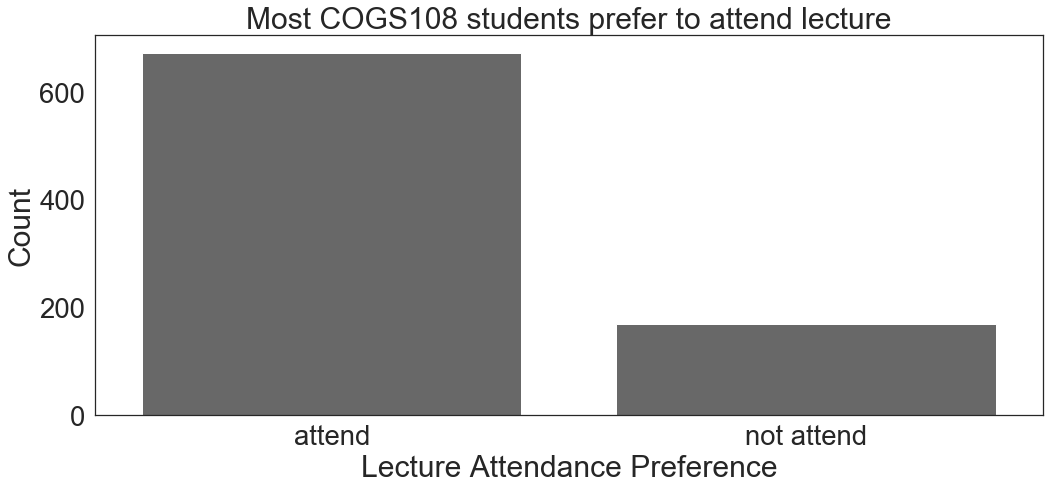

In [27]:
sns.countplot(x='lecture_attendance', data=df, color = "#686868")
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students prefer to attend lecture')
ax.set_ylabel('Count')
ax.set_xlabel('Lecture Attendance Preference')
ax.set_xticklabels(("attend", "not attend"));

Text(0.5, 0, 'Gender')

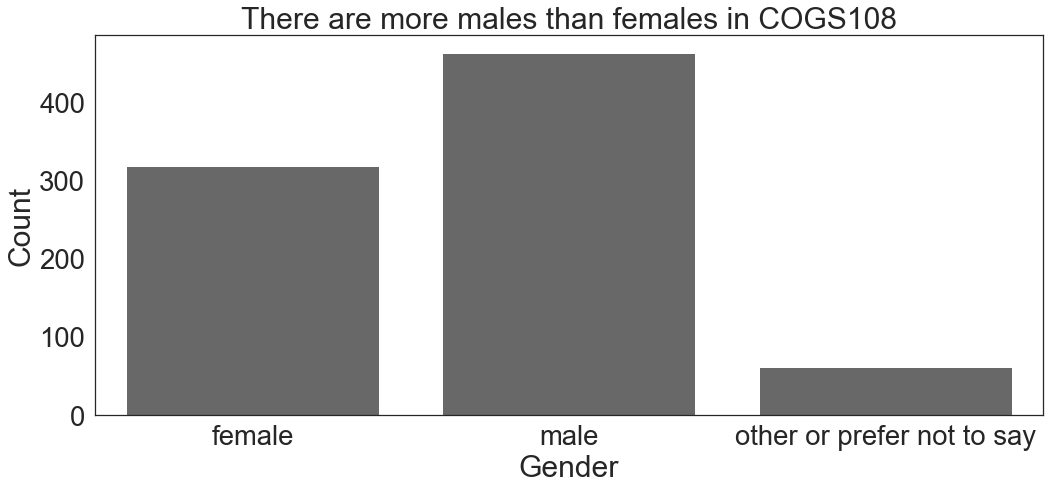

In [28]:
sns.countplot(x='gender', data=df, color = "#686868")
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('There are more males than females in COGS108')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')

It's often a good idea to order axes from larged to smallest for categorical data.

Text(0.5, 0, 'Gender')

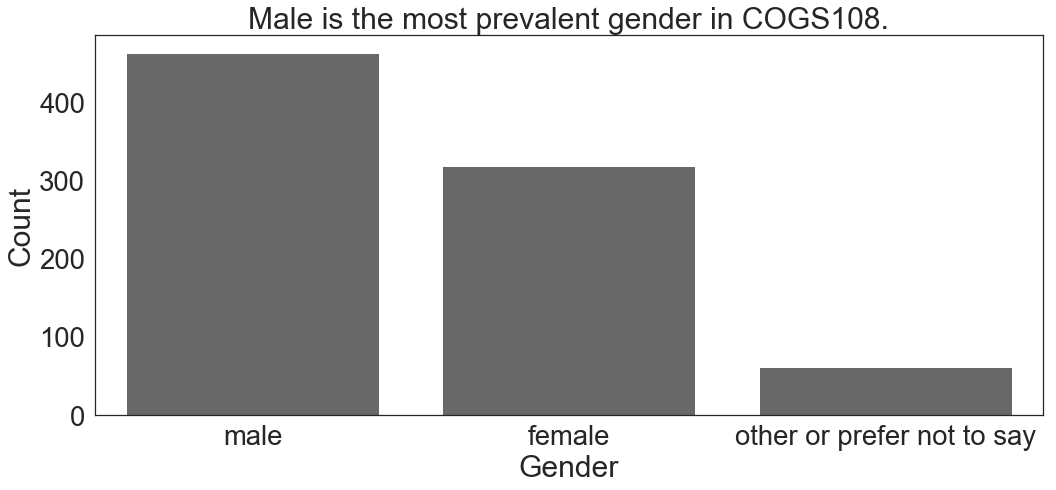

In [29]:
sns.countplot(x='gender', data=df, color = "#686868",
             order = ["male", "female", "other or prefer not to say"])
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Male is the most prevalent gender in COGS108.')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')

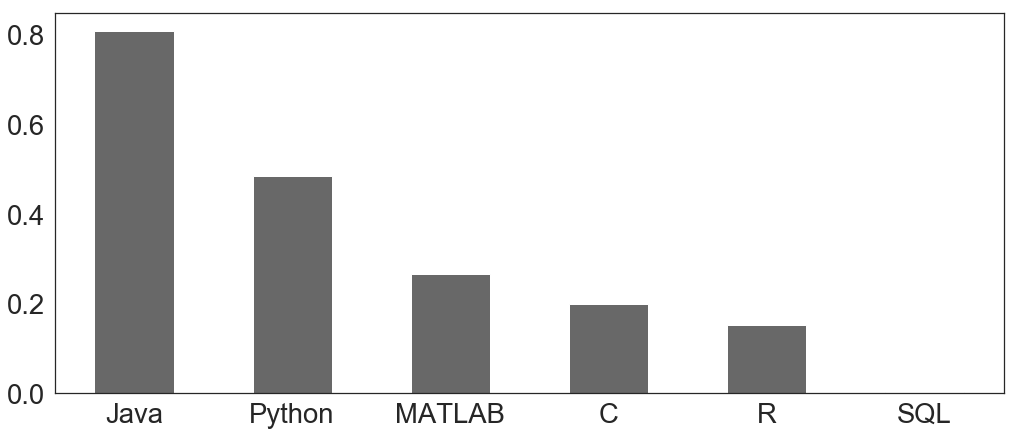

In [30]:
# pandas approach
# proportion of the class familiar with each programming language
a = df.iloc[:,5:11].sum()/len(df)
a = a.sort_values(axis=0, ascending=False)
a.plot.bar( color = "#686868", rot=0);

### Grouped Barplots

In `seaborn` there are two types of bar charts:
1. `countplot` - counts the number of times each category appears in a column
2. `barplot` - groups dataframe by a categorical column and plots the height bars according to the average of a numerical column within each group (This is usually not the right way to visualize quantitative data, so we're not covering it in this class.)

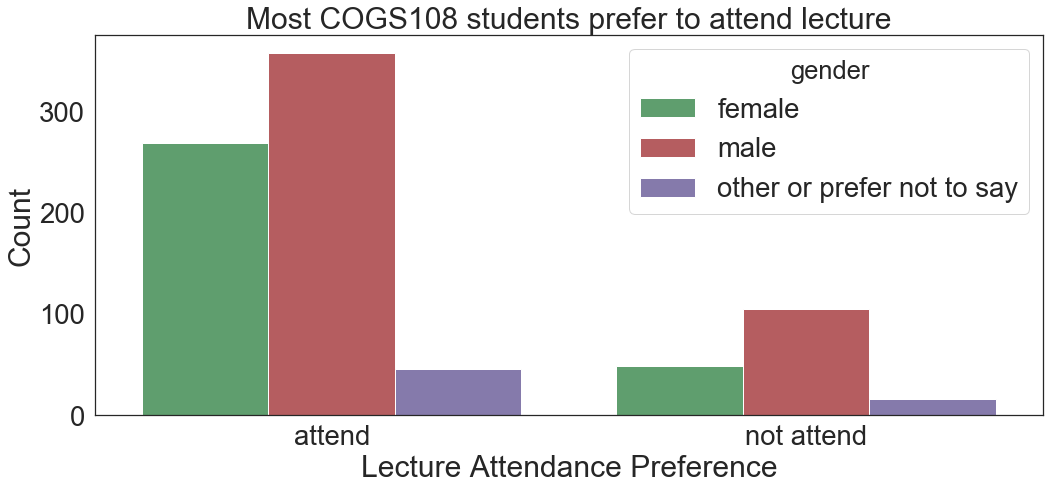

In [31]:
# same color palette as defined earlier
# generate grouped barplot by specifying hue
sns.countplot(x='lecture_attendance', hue = 'gender', 
              data=df, palette = palette)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students prefer to attend lecture')
ax.set_ylabel('Count')
ax.set_xlabel('Lecture Attendance Preference')
ax.set_xticklabels(('attend', 'not attend'));

Because we have different numbers of males and females, comparing counts is not all that helpful... 

We need proportions.

### Stacked Barplots

<Figure size 1224x504 with 0 Axes>

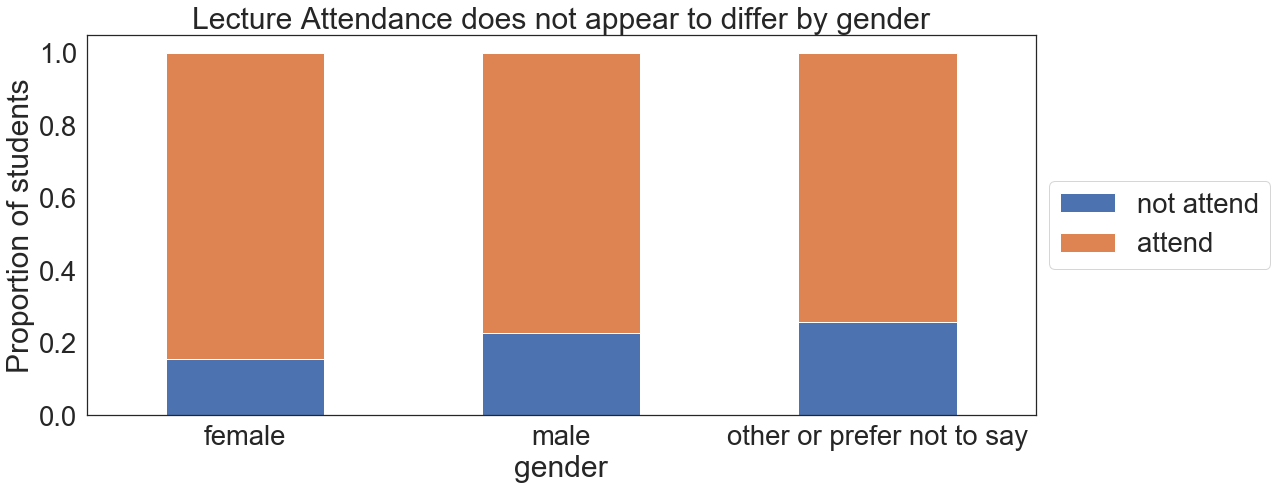

In [32]:
f = plt.figure();
df2 = df.groupby([ 'lecture_attendance','gender'])['lecture_attendance'].count().unstack('gender').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))
sub_df2.plot(kind='bar', stacked=True, rot=0)
plt.legend(('not attend','attend'), loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Lecture Attendance does not appear to differ by gender')
plt.ylabel('Proportion of students');

# More plots

- boxplots (quantitative + categorical)
- lineplots (quantiative over time

### Boxplots

By default, the box delineates the 25th and 75th percentile. The line down the middle represents the median. "Whiskers" extend to show the range for the rest of the data, excluding outliers. Outliers are marked as individual points outside of the whiskers.

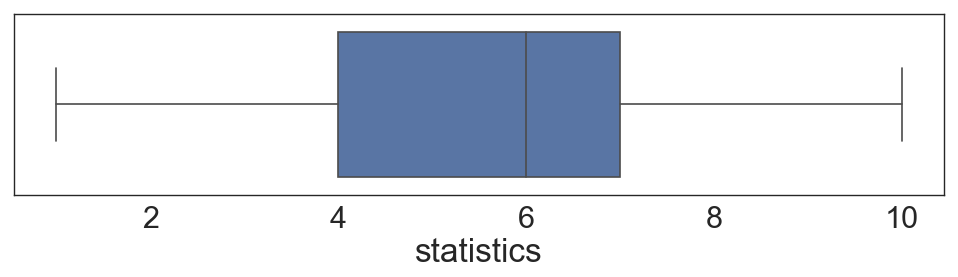

In [33]:
# controlling how this plot displays
fig=plt.figure(figsize=(15, 3), dpi= 80, facecolor='w', edgecolor='k')

# generate boxplots
sns.boxplot(x='statistics', data=df);


## Outlier determination

Outliers show up as individual points on boxplots. But, we don't see any on this boxplot. Let's see why...

In [34]:
# determine the 25th and 75th percentiles
lower, upper = np.percentile(df['statistics'], [25, 75])
lower, upper

(4.0, 7.0)

In [35]:
# calculate IQR
iqr = upper - lower
iqr

3.0

Typically, the inter-quartile range (IQR) is used to determine which values get marked as outliers. The IQR is: 75th percentile - 25th percentile. Values greater than 1.5 x IQR above the 75th or below the 25th percentile are marked as outliers.  

In [36]:
# calculate lower cutoff
# values below this are outliers 
lower_cutoff = lower - 1.5 * iqr

# calculate upper cutoff
# values above this are outliers 
upper_cutoff = upper + 1.5 * iqr

lower_cutoff, upper_cutoff

(-0.5, 11.5)

Boxplots really shine when you want to look at the range of typical values for a quantitative variable, _broken down by a separate categorical variable_.

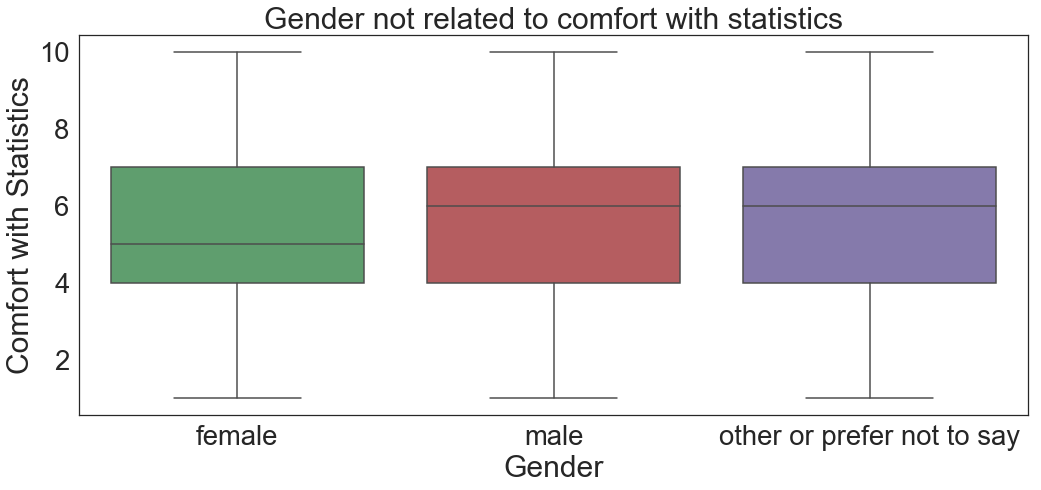

In [37]:
# generate boxplotsa
# we can make sure the colors match what we used earlier for the same groups
sns.boxplot(x='gender', y='statistics', data=df, palette=palette)
ax = plt.gca()
ax.set_title('Gender not related to comfort with statistics')
ax.set_ylabel('Comfort with Statistics')
ax.set_xlabel('Gender');

Much better! 

# Histograms (by a categorical variable)

The same data plotted as a histogram are not so easily interpretable.

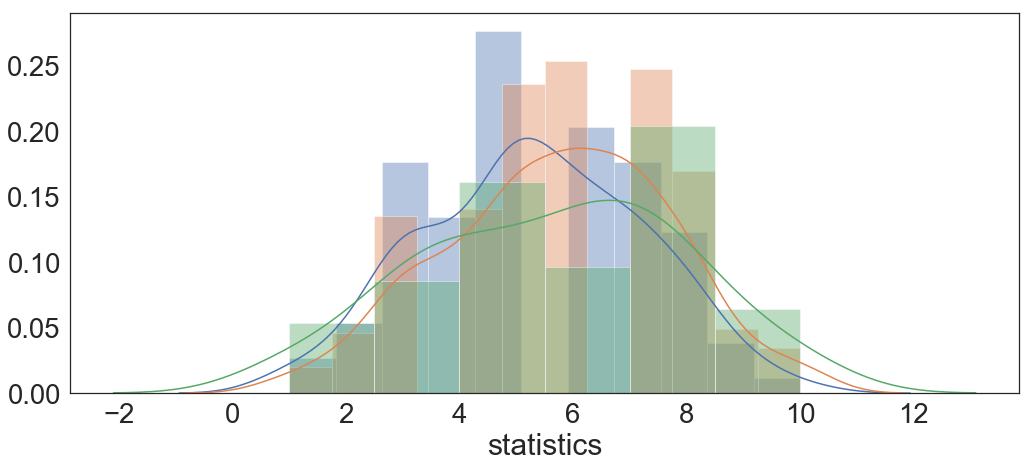

In [38]:
sns.distplot(df.loc[df['gender'] == 'female', 'statistics'])
sns.distplot(df.loc[df['gender'] == 'male', 'statistics'])
sns.distplot(df.loc[df['gender'] == 'other or prefer not to say', 'statistics']);

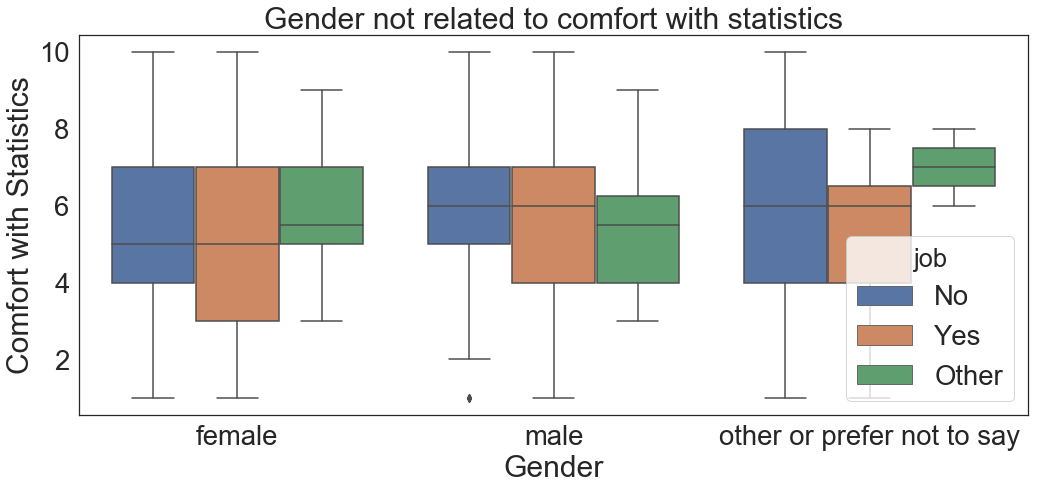

In [39]:
# generate boxplotsa
# we can make sure the colors match what we used earlier for the same groups
sns.boxplot(x='gender', y='statistics', hue='job', data=df)
ax = plt.gca()
ax.set_title('Gender not related to comfort with statistics')
ax.set_ylabel('Comfort with Statistics')
ax.set_xlabel('Gender');

# Customization: Style Sheets

Earlier, we discussed using `sns.set_style()` to change the style of your plots. 

The default style of your plots can _also_ be controlled with _style sheets_. For example, the **FiveThirtyEight style** mimics the graphics on [FiveThirtyEight](https://fivethirtyeight.com/).

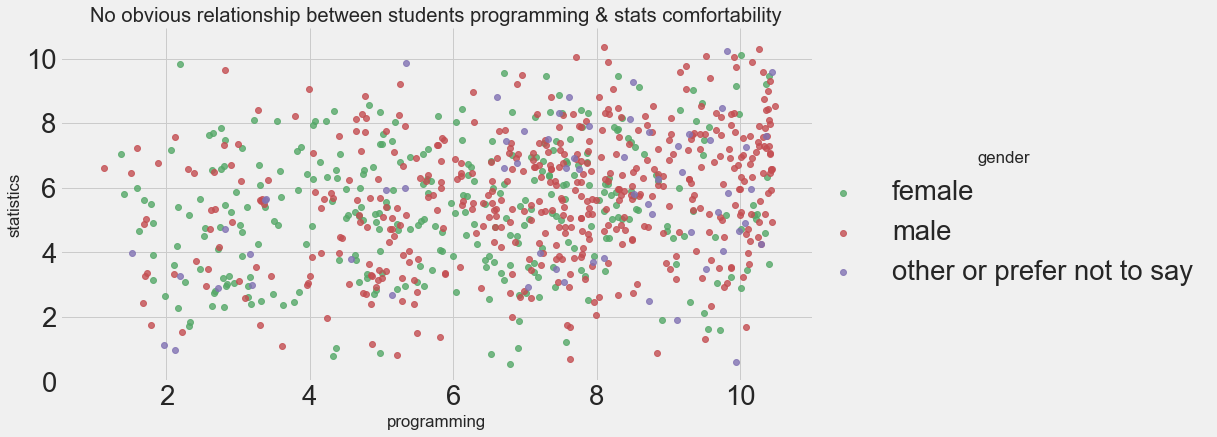

In [40]:
with plt.style.context('fivethirtyeight'):
    # color points by gender is
    sns.lmplot(x='programming', y='statistics', data=df, hue='gender',
               fit_reg=False, height=6, aspect=2, 
               x_jitter=.5, y_jitter=.5,
              palette=palette)
    # customize title
    ax = plt.gca()
    ax.set_title('No obvious relationship between students programming & stats comfortability');

You can read more about other styles [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html).

# Customization: `births` data

Now that we're getting the hang of this, let's see how complicated things can get. We'll return to using a line chart to look at birth patterns over time. 

In [41]:
# get the data
births = pd.read_csv('births.csv')
births.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

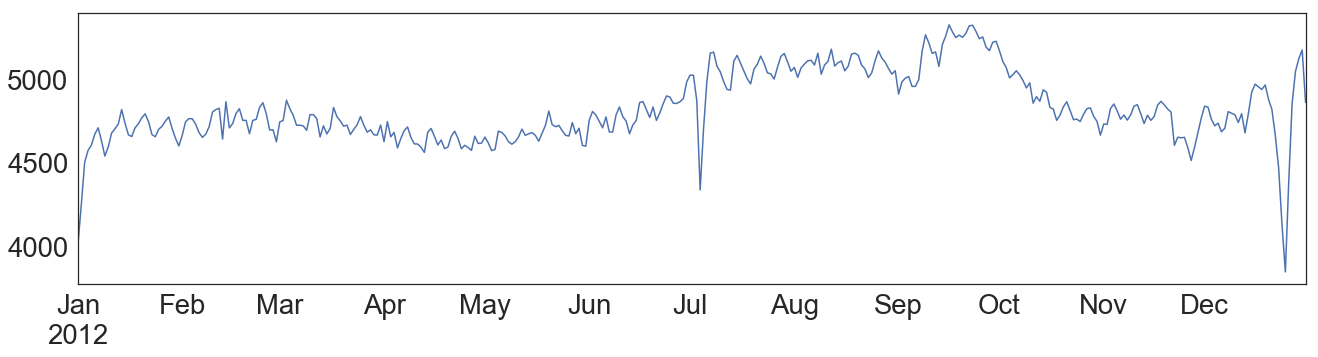

In [42]:
# calculate values & wrangle
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]


# plot the thing
fig, ax = plt.subplots(figsize=(22, 5))
births_by_date.plot(ax = ax)
ax.get_legend().remove()

What are all those dips? Well, let's annotate the plot to get a better sense of what's going on.

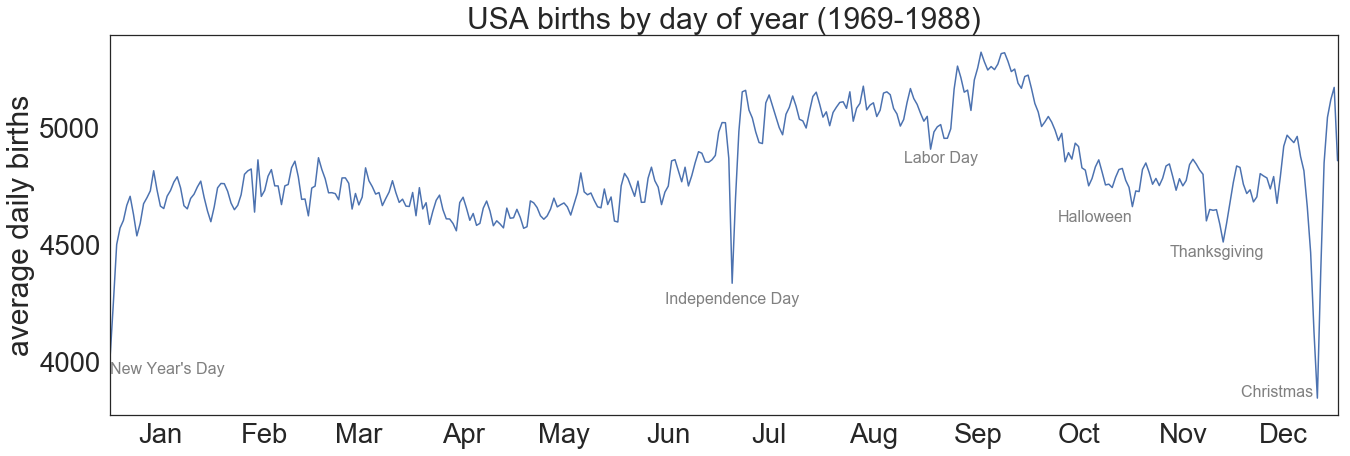

In [43]:
# plot the thing
fig, ax = plt.subplots(figsize=(22, 7))
births_by_date.plot(ax=ax)
ax.get_legend().remove();

# define style
style = dict(size=16, color='gray')

# add annotation
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Annotation directly on plots can help explain the plot to viewers.

# Saving Plots

While we're using a Jupyter notebook right now, you won't always be. So, you'll need to know how to save figures.

In [44]:
# save fig to plots directory
# this will only work if you have 
# a plots directory in your working directory
fig.savefig('my_figure.png')

Note that the file format is inferred from the extension you specify in the filename. 

To see which file types are supported:

In [45]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

# Viewing Saved Plots

Once a plot is saved, it may be helpful to view it through IPython or your notebook. To do so, you'd use the following:

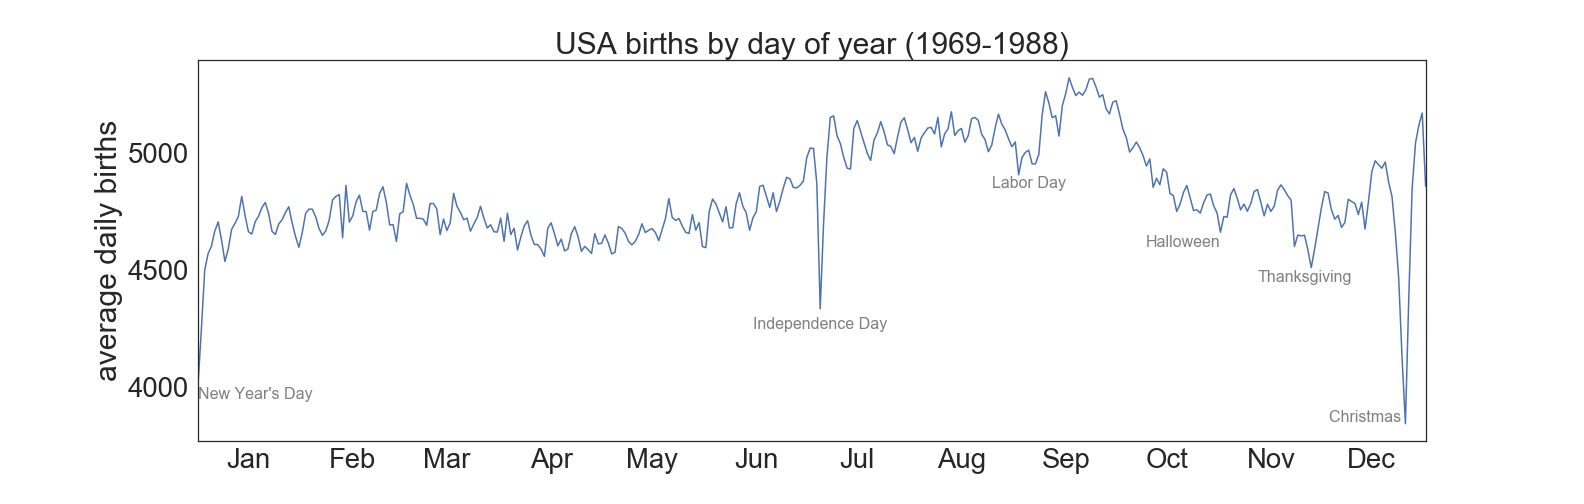

In [46]:
# to see contents of a saved image
from IPython.display import Image
Image('my_figure.png')